In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime as dt
import sys
import warnings
warnings.filterwarnings('ignore')

In [40]:
All_charges = pd.read_csv('merge/All_charges.csv')
All_charges.sample(10)

,Addon,Charge Amount,Charged Amount,Client,Job,Job Number,Occurred Date,Post date,Seq,Tdate
869980,10,13.0,NaN,1,NaN,0301-A,8/21/2018,8/24/2018,1,8/21/2018
2810666,19,61.6,NaN,3,NaN,0169-A,9/24/2019,9/25/2019,1,9/24/2019
1243421,2241,105.0,NaN,134,NaN,0627-A,1/11/2021,1/19/2021,3,1/11/2021
2102868,2092,405.0,NaN,127,NaN,0324-A,1/28/2020,1/31/2020,1,1/28/2020
3286046,1951,211.6,NaN,116,NaN,0222-A,8/30/2020,9/13/2020,1,8/30/2020
380223,759,NaN,0.0,30,0326-A,NaN,10/23/2017,10/25/2017,1,10/23/2017
201903,1264,NaN,900.0,61,0321-A,NaN,6/16/2017,6/20/2017,1,6/16/2017
252874,1392,NaN,59.4,71,0490-A,NaN,7/23/2017,8/2/2017,1,7/23/2017
2155595,1561,13.2,NaN,83,NaN,1272-A,2/14/2020,4/1/2020,1,2/14/2020
2151299,1839,1900.0,NaN,114,NaN,0600-A,2/13/2020,2/17/2020,1,2/13/2020


In [41]:
print(f'\nThe Charge table contains {All_charges.shape[0]} samples and {All_charges.shape[1]} variables')


The Charge table contains 3676059 samples and 10 variables


In [42]:
All_charges.dtypes

Addon               int64
Charge Amount     float64
Charged Amount    float64
Client              int64
Job                object
Job Number         object
Occurred Date      object
Post date          object
Seq                 int64
Tdate              object
dtype: object

In [43]:
# check for null values
All_charges.isnull().sum()

Addon                   0
Charge Amount      486367
Charged Amount    3189692
Client                  0
Job               3189692
Job Number         486367
Occurred Date           0
Post date               0
Seq                     0
Tdate                   0
dtype: int64

In [6]:
# drop all rows with null values from the columns list
#All_charges.dropna(subset=['Charge Amount', 'Charged Amount', 'Job', 'Job Number'], how='any', inplace=True)

In [11]:
#All_charges.isnull().sum()

In [44]:
# Convert Tdate column to datetime
All_charges['Tdate'] = pd.to_datetime(All_charges['Tdate'])

In [45]:
All_charges.shape

(3676059, 10)

In [46]:
# Check for unique values
All_charges['Tdate'].nunique()

1564

#### Create a Month Column

In [47]:
All_charges['month'] = All_charges['Tdate'].dt.month 
All_charges['Year'] = All_charges['Tdate'].dt.year

In [48]:
All_charges['Year'].value_counts()

2020    1096772
2019    1075310
2018     725300
2017     486367
2021     292310
Name: Year, dtype: int64

In [49]:
All_charges.columns

Index(['Addon', 'Charge Amount', 'Charged Amount', 'Client', 'Job',
       'Job Number', 'Occurred Date', 'Post date', 'Seq', 'Tdate', 'month',
       'Year'],
      dtype='object')

In [102]:
All_charges_1 = All_charges['Year']== 2019
df_All_charges = All_charges.loc[All_charges_1]
#df_All_charges.sample(6)

In [103]:
# Group dataframe using the month column
charge_grp_month = All_charges.groupby('month')['Charged Amount'].sum()

In [104]:
type(charge_grp_month)

pandas.core.series.Series

In [105]:
# convert series into dataframe, reset index and rename columns
df_charge_grp_month = charge_grp_month.to_frame().rename(columns={'month':'Month', 'Charged Amount':'Charges'}).reset_index()

In [106]:
df_charge_grp_month.head()

,month,Charges
0,1,49623976.8
1,2,52746130.0
2,3,58522775.6
3,4,60841678.0
4,5,64696990.0


In [108]:
df_charge_grp_month.describe().style.format('{:.3f}')

,month,Charges
count,12.000,12.000
mean,6.500,64474574.258
std,3.606,7800048.677
min,1.000,49623976.800
25%,3.750,60261952.400
50%,6.500,66035164.400
75%,9.250,68794632.650
max,12.000,75104103.900


### Client Denial Table

In [58]:
client_denial_information = pd.read_csv('data/5_Tables_that_includes_denial_information_by_client_and_payor_type.csv')
client_denial_information.head(3)

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,Call Type,Response Priority,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr
0,1/1/2017,0209-A,PIT,38,HealthNet Aeromedical Services,Ground Transport,Municipal: Fire Based,8229,Medicare WV Rural,Closed,Rotor,Emergency,0.0,2/16/2017,NaN,2/15/2017,0,76,CO16,Claim/service lacks information which is neede...
1,1/1/2017,0372-A,PIT,47,Canonsburg General Hospital Ambulance Service,Ground Transport,Hospital-based,22,United Healthcare (30555) Commercial,Closed,BLS,Emergency,0.0,11/13/2017,NaN,11/10/2017,0,135,PR27,Expenses incurred after coverage terminated.
2,1/1/2017,0226-A,PIT,35,WCA Services Corporation,Ground Transport,Municipal: Fire Based,7697,14-Erie Co Medicaid,Closed,Rotor,Flight,0.0,5/19/2017,5/1/2017,5/18/2017,0,2825,68,Claim submission date not within required time...


In [59]:
print(f'\nThe Client denial table contains {client_denial_information.shape[0]} samples and {client_denial_information.shape[1]} variables')


The Client denial table contains 456421 samples and 20 variables


In [22]:
client_denial_information.dtypes

Trip Date               object
Job Number              object
Database                object
Client Code              int64
Client                  object
Service Type: Name      object
Market Type             object
Payor Code               int64
Payor                   object
Trip Status             object
Call Type               object
Response Priority       object
Charge                 float64
Post Date               object
Check Date              object
Deposit Date            object
Batch Number             int64
Denial Code              int64
Denial Reason Code      object
Denial Reason Descr     object
dtype: object

In [60]:
client_denial_information['Trip Date'] = pd.to_datetime(client_denial_information['Trip Date'])

In [21]:
#client_denial_information.dtypes

In [61]:
client_denial_information.shape

(456421, 20)

In [62]:
client_denial_information.isnull().sum()

Trip Date                   0
Job Number                  0
Database                    0
Client Code                 0
Client                      0
Service Type: Name      94028
Market Type             94028
Payor Code                  0
Payor                       0
Trip Status                 0
Call Type                   0
Response Priority           0
Charge                 123760
Post Date                   0
Check Date             124321
Deposit Date                0
Batch Number                0
Denial Code                 0
Denial Reason Code       9357
Denial Reason Descr         0
dtype: int64

In [63]:
# Check for unique values
client_denial_information['Trip Date'].nunique()

1569

In [25]:
#client_denial_information['Trip Date'].value_counts()

#### Create Month and Year Column

In [64]:
client_denial_information['month'] = client_denial_information['Trip Date'].dt.month
client_denial_information['Year'] = client_denial_information['Trip Date'].dt.year

In [65]:
client_denial_information.shape

(456421, 22)

In [66]:
client_denial_information['Year'].value_counts()

2020    153266
2019    119881
2018     89405
2017     69555
2021     24314
Name: Year, dtype: int64

In [67]:
client_denial_information['Trip Date'].nunique()

1569

In [30]:
#client_denial_information.sample(10)

In [109]:
client_denial_information_1 = client_denial_information['Year']== 2019
df_client_denial_information = client_denial_information.loc[client_denial_information_1]
#df_client_denial_information.sample(6)

In [110]:
df_client_denial_information.shape

(119881, 22)

In [70]:
df_client_denial_information.columns

Index(['Trip Date', 'Job Number', 'Database', 'Client Code', 'Client',
       'Service Type: Name', 'Market Type', 'Payor Code', 'Payor',
       'Trip Status', 'Call Type', 'Response Priority', 'Charge', 'Post Date',
       'Check Date', 'Deposit Date', 'Batch Number', 'Denial Code',
       'Denial Reason Code', 'Denial Reason Descr', 'month', 'Year'],
      dtype='object')

In [111]:
# Group dataframe using the month column
grp_months = df_client_denial_information.groupby('month')['Charge'].sum()

In [35]:
type(grp_months)

pandas.core.series.Series

In [112]:
# convert series into dataframe and reset index
df_grp_months = grp_months.to_frame().reset_index()
#df_grp_months = pd.DataFrame(grp_months)

In [113]:
df_grp_months.describe().style.format('{:.3f}')

,month,Charge
count,12.000,12.000
mean,6.500,3229355.167
std,3.606,913425.248
min,1.000,1970609.000
25%,3.750,2563317.750
50%,6.500,3129579.000
75%,9.250,4099150.500
max,12.000,4622536.000


In [114]:
df_grp_months.head()

,month,Charge
0,1,2617045.0
1,2,1970609.0
2,3,2003470.0
3,4,2402136.0
4,5,2808195.0


### Denial By Month in 2019

In [88]:
# merge df_grp_months and df_charge_grp_month
df_grp_months.columns

Index(['month', 'Charge'], dtype='object')

In [89]:
df_charge_grp_month.columns

Index(['month', 'Charges'], dtype='object')

In [115]:
denial_month_2019 = pd.merge(df_charge_grp_month, df_grp_months)
denial_charge = denial_month_2019.rename(columns={'Charges':'Total Charge 2019', 'Charge':'Denial Charge 2019'})

In [116]:
denial_charge['% per month'] = denial_charge['Denial Charge 2019']/denial_charge['Total Charge 2019']*100

In [117]:
denial_charge

,month,Total Charge 2019,Denial Charge 2019,% per month
0,1,49623976.8,2617045.0,5.273751
1,2,52746130.0,1970609.0,3.736026
2,3,58522775.6,2003470.0,3.423402
3,4,60841678.0,2402136.0,3.948175
4,5,64696990.0,2808195.0,4.340534
5,6,65970967.3,2941280.0,4.458446
6,7,66099361.5,3530307.0,5.340909
7,8,75104103.9,4259262.0,5.671144
8,9,68170684.1,4221015.0,6.191833
9,10,69325958.3,4058529.0,5.854270


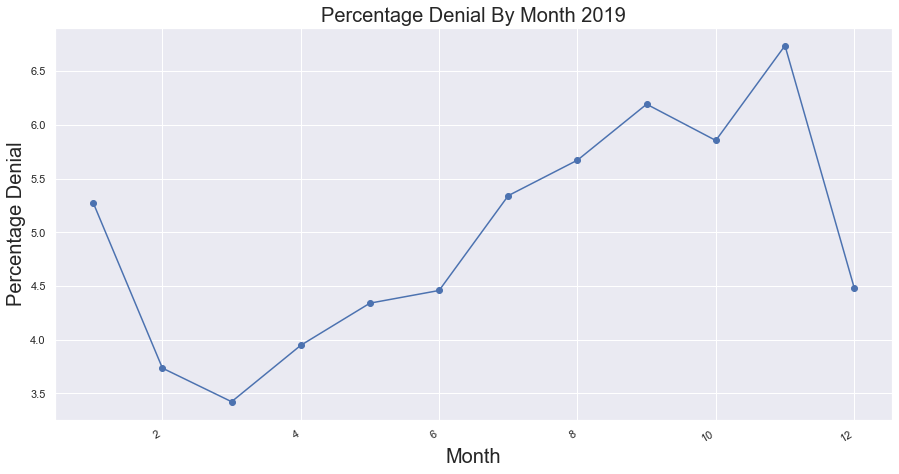

In [118]:
# Plot the yearly data point to ascertain the Monthly trend
plt.figure(figsize=(15,8))
plt.plot(denial_charge['month'], denial_charge['% per month'], marker='o')
plt.xlabel('Month', size=20)
plt.ylabel('Percentage Denial', size=20)
plt.title('Percentage Denial By Month 2019', size=20)
plt.savefig('Percentage Denial By Month 2019.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
#plt.gca().xaxis.set_major_formatter(date_format)

### Reason For High Denial in January 2020

In [119]:
df_client_denial_information.head()

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,...,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr,month,Year
89703,2019-01-01,0543-A,PIT,46,LifeMed Alaska,Air Transport,Private : For- Profit,8915,Tanana Chiefs Conference,Closed,...,0.0,3/19/2019,NaN,3/15/2019,0,1195,denied,Insurance denied,1,2019
89704,2019-01-01,0603-A,PIT,114,Orion Ambulance Service LLC,Ground Transport,Private : For- Profit,9599,United Healthcare Medicaid (31362 ),Closed,...,0.0,4/8/2019,NaN,3/31/2019,0,1246,auth,Benefit requires prior authorization,1,2019
89705,2019-01-01,0354-A,PIT,3,Guardian Medical Transport,Air and Ground Transport,Hospital-based,8413,AHCCCS UHC COMMUNITY PLAN (5290),Billed,...,0.0,9/5/2019,NaN,8/19/2019,0,144,PI29,The time limit for filing has expired.,1,2019
89706,2019-01-01,0407-A,PIT,111,Health Team Critical Care Transport,Ground Transport,Municipal: Third Service (EMS),8230,Medicare WV Urban,Closed,...,NaN,2/28/2019,2/21/2019,2/21/2019,235864,76,CO16,Claim/service lacks information which is neede...,1,2019
89707,2019-01-01,0586-A,PIT,37,Allegheny General Hospital,NaN,NaN,9935,Highmark BC/BS (Inst),Closed,...,0.0,4/26/2019,NaN,4/25/2019,0,76,CO16,Claim/service lacks information which is neede...,1,2019


In [121]:
client_denial_reason = df_client_denial_information['month']== 11
df_client_denial_reason = df_client_denial_information.loc[client_denial_reason]
df_client_denial_reason.sample(6)

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,...,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr,month,Year
419692,2019-11-23,0041-A,MW,20,Champion EMS,Ground Transport,Municipal: Third Service (EMS),5022,zzSedgwick (14498),Billed,...,0.0,2/10/2020,NaN,1/30/2020,0,480,PR96,Non-covered charge(s). This change to be effec...,11,2019
342280,2019-11-08,0032-A,CTA,1,BRISTOL HOSPITAL EMS LLC,NaN,NaN,243,Medicare CT,Closed,...,29.0,11/25/2019,11/22/2019,11/22/2019,73031,250,PR50,These are non-covered services because this is...,11,2019
342584,2019-11-13,0082-A,CTA,1,BRISTOL HOSPITAL EMS LLC,NaN,NaN,121,Connecticut State Welfare,Closed,...,91.0,1/29/2020,1/14/2020,1/14/2020,75527,76,CO16,Claim/service lacks information which is neede...,11,2019
168426,2019-11-27,0185-A,PIT,120,Monongalia Emergency Medical Services Inc.,Ground Transport,Municipal: Third Service (EMS),8262,Blue Cross and Blue Shield of West Virginia,Closed,...,2086.0,1/10/2020,1/2/2020,1/2/2020,302239,110,PR22,Payment adjusted because this care may be cove...,11,2019
163635,2019-11-09,0435-A,PIT,18,Medical Rescue Team South Authority,NaN,NaN,2,Medicare PA,Closed,...,580.0,11/21/2019,11/19/2019,11/19/2019,290728,130,PR26,Expenses incurred prior to coverage.,11,2019
167732,2019-11-24,0342-A,PIT,111,Health Team Critical Care Transport,Ground Transport,Municipal: Third Service (EMS),7319,The Health Plan of Upper Ohio Valley,Closed,...,0.0,1/2/2020,NaN,12/24/2020,0,3187,DOB,Member's DOB is missing or invalid,11,2019


In [123]:
#df_client_denial_reason['Denial Reason Code'] = pd.to_numeric(df_client_denial_reason['Denial Reason Code'])

In [ ]:
#df_client_denial_reason.nlargest(5, ['Denial Reason Code'])

In [ ]:
#df_client_denial_reason['Denial Reason Code'].value_counts().sort_values

In [130]:
# Number of trips performed in November
len(df_client_denial_reason['Trip Date'])

11510

In [124]:

# Filter data between 2017 and 2021
client_denial_reason_data = df_client_denial_reason['Denial Reason Code'].isin(['CO22', 'PR96', 'CO16', 'CO109', 'OA18'])
df_client_denial_reason_data = df_client_denial_reason.loc[client_denial_reason_data]
df_client_denial_reason_data[['Denial Reason Code', 'Denial Reason Descr']]

,Denial Reason Code,Denial Reason Descr
161074,CO16,Claim lacks information needed for adjudication
161077,PR96,Non-covered charge(s). This change to be effec...
161078,CO16,Claim/service lacks information which is neede...
161079,CO16,Claim/service lacks information which is neede...
161084,CO16,Claim/service lacks information which is neede...
161089,CO16,Claim lacks information needed for adjudication
161090,CO16,Claim lacks information needed for adjudication
161094,CO16,Claim/service lacks information which is neede...
161096,CO16,Claim lacks information needed for adjudication
161107,PR96,Non-covered charge(s). This change to be effec...


### Denials Rate By Payors in January 2020

In [ ]:
payor_denial_2020 = df_client_denial_information.copy()

In [ ]:
payor_denial_2020.columns

In [ ]:
#payor_denial_2020['Year'].value_counts()

In [ ]:
payor_denial_2020.tail()

In [ ]:
payor_denial_2020['Trip Status'].value_counts()

In [ ]:
trip_status_payor_denial_2020 = payor_denial_2020['Trip Status']== 'Billed'
df_trip_status_payor_denial_2020 = payor_denial_2020.loc[trip_status_payor_denial_2020]
df_trip_status_payor_denial_2020.sample(6)

In [ ]:
df_payor_denial_2020 = df_trip_status_payor_denial_2020[['Payor', 'Charge', 'Month']]
df_payor_denial_2020.tail()

In [ ]:
# drop rows when charge column contains a Null value
# df_payor_denial_2020.dropna(subset=['Charge', 'Payor', 'Month'], how='any')

In [49]:
# Caaalculaaate the average Number 
df = df_payor_denial_2020.pivot_table(index='Payor', columns='Month', values='Charge', margins=True, margins_name='Avg. Denied Charge')

NameError: name 'df_payor_denial_2020' is not defined

In [47]:
df2 = df.sort_values('Avg. Denied Charge', ascending=False).head(10)
df_2 = df2.iloc[0:9, :]
df_2

NameError: name 'df' is not defined

In [ ]:
# The different fuel types
plt.figure(figsize =(14,8))
g = sns.lineplot(x = 'Month', y = 'Charge', hue = 'Payor', data = df_2, markers =True)
g.set_yscale('log')
plt.title('Energy Consumption')
plt.xlabel('Year')
#plt.ylabel('Fuel Qty')
#plt.show()